<a href="https://colab.research.google.com/github/raihankemmy/CreditLoanRisk/blob/main/CreditLoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Loan Prediction

ID/X Partners Data Scientist Virtual Internship Program
<br>Raihan Kemmy Rachmansyah

### Install Imbalanced Learn Package

In [2]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Menyambungkan ke Akun Google 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Package yang akan Digunakan

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Set jumlah maksimal Display pada kolom dan baris menjadi tidak terhingga atau tidak ada batasan maksimal

### Import Data

In [6]:
data_raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/loan_data_2007_2014.csv", index_col='Unnamed: 0')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


menjadikan kolom 0 atau unnamed: 0 menjadi kolom index pada data

# Cleaning Data

### Melihat Jumlah Baris dan Kolom pada data

In [7]:
data_raw.shape

(466285, 74)

### Melihat Data yang terdapat Missing Value atau Data yang Kosong

In [8]:
data_raw.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [9]:
missing_value = data_raw[data_raw.columns[(data_raw.isna().sum() == data_raw.shape[0])]]
data_raw.drop(columns=missing_value.columns, inplace=True)

menghapus kolom yang memiliki jumlah data yang kosong sebanyak dengan jumlah data keseluruhan

In [10]:
missing_data = data_raw[data_raw.columns[(data_raw.isna().sum() > 0)]]
missing_data.isnull().sum()

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

melihat kembali jumlah kolom yang terdapat data yang kosong

## Mengatasi Kolom Kategorikal

In [11]:
missing_value = data_raw[data_raw.columns[(data_raw.isna().sum() >  0) & (data_raw.dtypes == 'object')]]
missing_value.isna().sum()

emp_title              27588
emp_length             21008
desc                  340302
title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

In [12]:
cat_value = ['emp_title', 'emp_length', 'desc', 'title', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
data_raw[cat_value].describe()

,emp_title,emp_length,desc,title,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,438697,445277,125983,466265,466256,465909,239071,466243
unique,205475,11,124436,63099,664,98,100,103
top,Teacher,10+ years,,Debt consolidation,Oct-00,Jan-16,Feb-16,Jan-16
freq,5399,150049,234,164075,3674,179620,208393,327699


### Kolom emp_title

The job title supplied by the Borrower when applying for the loan.*

In [13]:
data_raw['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'MecÃ¡nica',
       'Chief of Interpretation (Park Ranger)', 'Server Engineer Lead'],
      dtype=object)

In [14]:
df = data_raw.drop(columns=['emp_title'], axis=1)

In [15]:
missing_value = df[df.columns[(df.isna().sum() >  0) & (df.dtypes == 'object')]]
missing_value.isna().sum()

emp_length             21008
desc                  340302
title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom emp_length

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [16]:
data_raw['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
df['emp_length'].fillna('10+ years', inplace=True)

In [18]:
mapping_loan_status = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '3 years': 3,
    '8 years': 8,
    '9 years': 9,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '2 years': 2,
    '7 years': 7
}

df['emp_length'] = df['emp_length'].map(mapping_loan_status)

In [19]:
df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [20]:
df['emp_length'] = df['emp_length'].astype(float)

In [21]:
missing_value = df[df.columns[(df.isna().sum() >  0) & (df.dtypes == 'object')]]
missing_value.isna().sum()

desc                  340302
title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom desc

In [22]:
data_raw['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [23]:
df.drop(columns='desc', inplace=True)

In [24]:
missing_value = df[df.columns[(df.isna().sum() >  0) & (df.dtypes == 'object')]]
missing_value.isna().sum()

title                     20
earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom title

In [25]:
df['title'].unique()

array(['Computer', 'bike', 'real estate business', ..., 'LoanGetter',
       'Consolidation 01', 'Paying off the car and some bills'],
      dtype=object)

In [26]:
df.drop(columns=['title'], inplace=True)

In [27]:
missing_value = df[df.columns[(df.isna().sum() >  0) & (df.dtypes == 'object')]]
missing_value.isna().sum()

earliest_cr_line          29
last_pymnt_d             376
next_pymnt_d          227214
last_credit_pull_d        42
dtype: int64

### Kolom earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d

In [28]:
kolom = ['earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df[kolom].describe()

,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466256,465909,239071,466243
unique,664,98,100,103
top,Oct-00,Jan-16,Feb-16,Jan-16
freq,3674,179620,208393,327699


Memodifikasi earliest_cr_line, last_payment_d, next_payment_d, last_credit_pull_d dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 1900an-2016, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2016 akhir yaitu pada bulan Desember. Dalam contoh ini, saya menggunakan tanggal 2016-12-01 sebagai reference date.

#### earliest_cr_line dan mths_since_earliest_cr

In [29]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [30]:
df['earliest_cr_line_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  466256
unique                    664
top       2000-10-01 00:00:00
freq                     3674
first     1969-01-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line_date, dtype: object

In [31]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2016-07-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head()

0    378.0
1    207.0
2    176.0
3    245.0
4    246.0
Name: mths_since_earliest_cr_line, dtype: float64

In [32]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        222.482430
std          93.974829
min        -629.000000
25%         166.000000
50%         208.000000
75%         268.000000
max         570.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [33]:
len(df[df['earliest_cr_line_date'].dt.year > 2014]['earliest_cr_line_date'].dt.year)

1169

In [34]:
earliest_year = df[df['earliest_cr_line_date'].dt.year > 2014]
earliest_year['earliest_cr_line_date'].min()

Timestamp('2044-01-01 00:00:00')

In [35]:
data_drop = df[df['earliest_cr_line_date'].dt.year > 2014]['earliest_cr_line_date'].dt.year
df.drop(data_drop.index, inplace=True)

In [36]:
df['earliest_cr_line_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  465087
unique                    515
top       2000-10-01 00:00:00
freq                     3674
first     1969-01-01 00:00:00
last      2011-11-01 00:00:00
Name: earliest_cr_line_date, dtype: object

In [37]:
df.drop(columns=['earliest_cr_line', 'earliest_cr_line_date'], inplace=True)

In [38]:
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)

#### last_payment_d dan mths_since_last_payment_d

In [39]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [40]:
df['last_pymnt_d_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  464741
unique                     98
top       2016-01-01 00:00:00
freq                   179104
first     2007-12-01 00:00:00
last      2016-01-01 00:00:00
Name: last_pymnt_d_date, dtype: object

In [41]:
df['mths_since_last_pymnt_d'].describe()

count    464741.000000
mean         19.298151
std          12.812808
min          11.000000
25%          11.000000
50%          12.000000
75%          23.000000
max         108.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [42]:
df.drop(columns=['last_pymnt_d', 'last_pymnt_d_date'], inplace=True)

In [43]:
df['mths_since_last_pymnt_d'].fillna(0, inplace=True)

#### next_payment_d dan mths_since_next_payment_d

In [44]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2016-12-01') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [45]:
df['next_pymnt_d_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  238390
unique                    100
top       2016-02-01 00:00:00
freq                   207784
first     2007-12-01 00:00:00
last      2016-03-01 00:00:00
Name: next_pymnt_d_date, dtype: object

In [46]:
df['mths_since_next_pymnt_d'].describe()

count    238390.000000
mean         10.738521
std           6.083252
min           9.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         108.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [47]:
df.drop(columns=['next_pymnt_d', 'next_pymnt_d_date'], inplace=True)

In [48]:
df['mths_since_next_pymnt_d'].fillna(0, inplace=True)

#### last_credit_pull_d dan mths_since_last_credit_pull_d

In [49]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2016-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [50]:
df['last_credit_pull_d_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  465075
unique                    103
top       2016-01-01 00:00:00
freq                   326849
first     2007-05-01 00:00:00
last      2016-01-01 00:00:00
Name: last_credit_pull_d_date, dtype: object

In [51]:
df['mths_since_last_credit_pull_d'].describe()

count    465075.000000
mean         15.045969
std           9.636585
min          11.000000
25%          11.000000
50%          11.000000
75%          13.000000
max         115.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [52]:
df.drop(columns=['last_credit_pull_d_date', 'last_credit_pull_d'], inplace=True)

In [53]:
df['mths_since_last_credit_pull_d'].fillna(0, inplace=True)

## Mengatasi Kolom Numerikal

In [54]:
missing_value = data_raw[data_raw.columns[(data_raw.isna().sum() >  0) & (data_raw.dtypes != 'object')]]
missing_value.isna().sum()

annual_inc                          4
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

In [55]:
missing_value.describe()

,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662810e+05,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,465945.000000,466256.000000,466140.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,7.327738e+04,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,56.176947,25.064430,0.009085,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,5.496357e+04,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,23.732628,11.600141,0.108648,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.500000e+04,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,39.200000,17.000000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,6.300000e+04,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,57.600000,23.000000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,8.896000e+04,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,74.700000,32.000000,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,7.500000e+06,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,892.300000,156.000000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


### kolom annual_inc

In [56]:
df['annual_inc'].mean()

73263.61380542752

In [57]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

In [58]:
missing_value = df[df.columns[(df.isna().sum() >  0) & (df.dtypes != 'object')]]
missing_value.isna().sum()

delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         249827
mths_since_last_record         402767
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
collections_12_mths_ex_med        145
mths_since_last_major_derog    366485
acc_now_delinq                     29
tot_coll_amt                    70144
tot_cur_bal                     70144
total_rev_hi_lim                70144
dtype: int64

### Check Missing Value yg diatas 75% di drop

In [59]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.594957
mths_since_last_major_derog    78.794322
mths_since_last_delinq         53.712837
tot_coll_amt                   15.080969
tot_cur_bal                    15.080969
total_rev_hi_lim               15.080969
revol_util                      0.073100
collections_12_mths_ex_med      0.031175
delinq_2yrs                     0.006235
inq_last_6mths                  0.006235
open_acc                        0.006235
pub_rec                         0.006235
total_acc                       0.006235
acc_now_delinq                  0.006235
dtype: float64

In [60]:
df.drop(columns=['mths_since_last_record', 'mths_since_last_major_derog'], inplace=True)

### kolom sisanya dilakukan fillna 0

In [61]:
df['tot_coll_amt'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['total_rev_hi_lim'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)

In [62]:
missing_value = df[df.columns[(df.isna().sum() >  0) & (df.dtypes != 'object')]]
missing_value.isna().sum()

Series([], dtype: float64)

## Melihat kembali Missing Value

In [63]:
sorted(df.isna().sum(), reverse=True)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [64]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'mths_since_earliest_cr_line',
       'mths_since_last_pymnt_d', 'mths_since_next_pymnt_d',
       'mths_since_last_credit_pull_d'],
      dtype='object')

In [65]:
df.drop(columns=['url', 'id', 'member_id', 'sub_grade', 'zip_code'], inplace=True)

In [66]:
df.reset_index(drop=True, inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,378.0,23.0,0.0,11.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,207.0,44.0,0.0,39.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,176.0,30.0,0.0,11.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,245.0,23.0,0.0,23.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,246.0,11.0,10.0,11.0


# Information About Data

In [67]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,378.0,23.0,0.0,11.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,207.0,44.0,0.0,39.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,176.0,30.0,0.0,11.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,245.0,23.0,0.0,23.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0,246.0,11.0,10.0,11.0


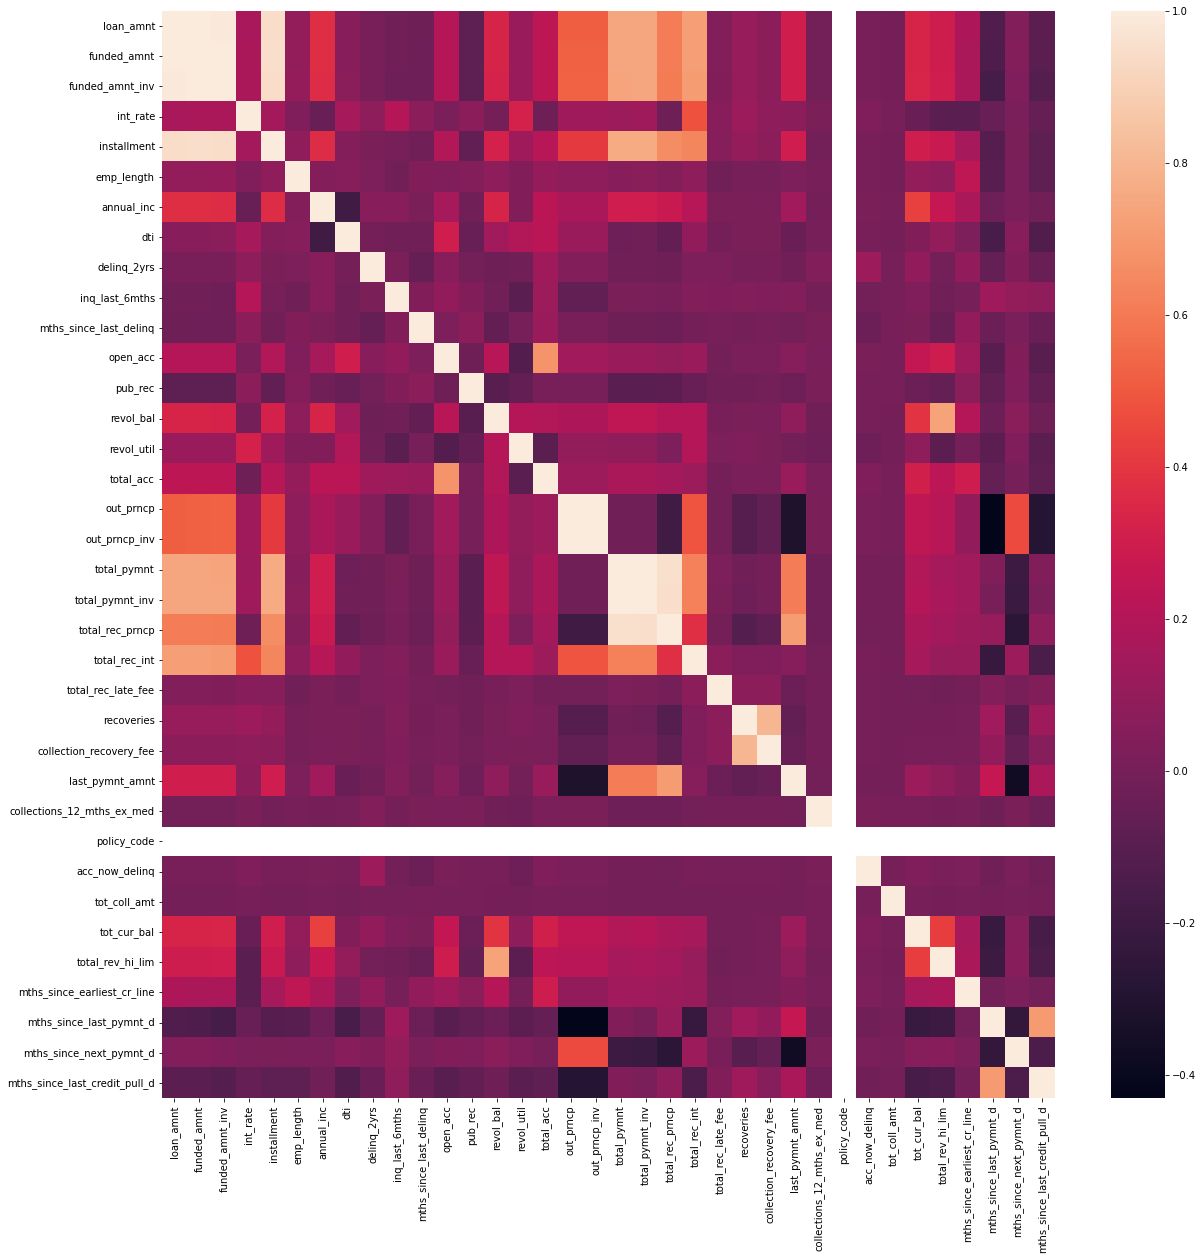

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

### Check data Kategorikal

In [69]:
df.select_dtypes(include='object').nunique()

term                    2
grade                   7
home_ownership          6
verification_status     3
issue_d                91
loan_status             9
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
application_type        1
dtype: int64

In [70]:
df.select_dtypes(exclude='object').nunique()

loan_amnt                          1352
funded_amnt                        1353
funded_amnt_inv                    9831
int_rate                            506
installment                       55565
emp_length                           11
annual_inc                        31787
dti                                3997
delinq_2yrs                          24
inq_last_6mths                       28
mths_since_last_delinq              146
open_acc                             62
pub_rec                              26
revol_bal                         58050
revol_util                         1268
total_acc                           113
out_prncp                        135366
out_prncp_inv                    140864
total_pymnt                      350888
total_pymnt_inv                  346944
total_rec_prncp                  172313
total_rec_int                    269852
total_rec_late_fee                 5793
recoveries                        22725
collection_recovery_fee           20230


Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.

In [71]:
df.drop(columns=['policy_code', 'application_type'], inplace=True)

### Memproses Kolom loan_status sebagai kolom target atau kolom label

In [72]:
df['loan_status'].value_counts()

Current                                                223577
Fully Paid                                             184379
Charged Off                                             42347
Late (31-120 days)                                       6885
In Grace Period                                          3144
Does not meet the credit policy. Status:Fully Paid       1983
Late (16-30 days)                                        1213
Default                                                   828
Does not meet the credit policy. Status:Charged Off       760
Name: loan_status, dtype: int64

`Current` artinya pembayaran lancar; `Charged Off` artinya pembayaran macet sehingga dihapusbukukan; `Late` artinya pembayaran telat dilakukan; `In Grace Period` artinya dalam masa tenggang; `Fully Paid` artinya pembayaran lunas; `Default` artinya pembayaran macet

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan `bad loan` (peminjam yang buruk) atau `good loan` (peminjam yang baik)

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran di atas 30 hari dan yang lebih buruk dari itu sebagai penanda bad loan.

In [73]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

df['status_loan'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d,status_loan
0,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,378.0,23.0,0.0,11.0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,0.0,207.0,44.0,0.0,39.0,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,176.0,30.0,0.0,11.0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,0.0,245.0,23.0,0.0,23.0,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,246.0,11.0,10.0,11.0,0


In [74]:
df['status_loan'].value_counts()

0    414296
1     50820
Name: status_loan, dtype: int64

In [75]:
df['status_loan'].value_counts(normalize=True)*100

0    89.073693
1    10.926307
Name: status_loan, dtype: float64

In [76]:
df.drop(columns=['loan_status'], inplace=True)

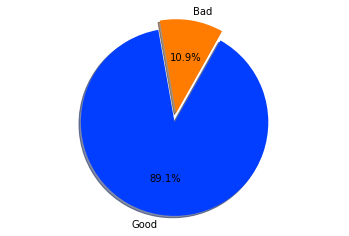

In [77]:
labels = [ 'Good', 'Bad']
explode = (0, 0.1)

colors = sns.color_palette('bright')[0:6]

fig1, ax1 = plt.subplots()
ax1.pie(df['status_loan'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, colors=colors)

ax1.axis('equal')
fig1.patch.set_facecolor('xkcd:white')
plt.show()

In [78]:
df.corr()['status_loan'].sort_values(ascending=False)
korelasi = df.corr()['status_loan'].sort_values(ascending=False) > 0.09
korelasi

status_loan                       True
recoveries                        True
collection_recovery_fee           True
mths_since_last_pymnt_d           True
int_rate                          True
total_rec_late_fee                True
mths_since_last_credit_pull_d     True
inq_last_6mths                   False
revol_util                       False
dti                              False
installment                      False
loan_amnt                        False
funded_amnt                      False
funded_amnt_inv                  False
delinq_2yrs                      False
acc_now_delinq                   False
tot_coll_amt                     False
mths_since_last_delinq           False
collections_12_mths_ex_med       False
open_acc                         False
pub_rec                          False
emp_length                       False
revol_bal                        False
total_acc                        False
total_rec_int                    False
mths_since_earliest_cr_li

# Prepocessing

### Membagi Kolom Numerik dan Kategorik

In [79]:
cat = df[df.dtypes[df.dtypes == 'object'].index]
num = df[df.dtypes[df.dtypes != 'object'].index]

In [80]:
cat.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

In [81]:
num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'mths_since_earliest_cr_line', 'mths_since_last_pymnt_d',
       'mths_since_next_pymnt_d', 'mths_since_last_credit_pull_d',
       'status_loan'],
      dtype='object')

### Memproses Kolom Kategorikal

In [82]:
cat.head()

,term,grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,initial_list_status
0,36 months,B,RENT,Verified,Dec-11,n,credit_card,AZ,f
1,60 months,C,RENT,Source Verified,Dec-11,n,car,GA,f
2,36 months,C,RENT,Not Verified,Dec-11,n,small_business,IL,f
3,36 months,C,RENT,Source Verified,Dec-11,n,other,CA,f
4,60 months,B,RENT,Source Verified,Dec-11,n,other,OR,f


In [83]:
cat.describe()

,term,grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,initial_list_status
count,465116,465116,465116,465116,465116,465116,465116,465116,465116
unique,2,7,6,3,91,2,14,50,2
top,36 months,B,MORTGAGE,Verified,Oct-14,n,debt_consolidation,CA,f
freq,337087,136550,235211,167439,38678,465107,273588,71240,302270


#### Memproses Kolom issue_d

In [84]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2016-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [85]:
df['mths_since_issue_d'].describe()

count    465116.000000
mean         39.259073
std          14.342403
min          24.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         114.000000
Name: mths_since_issue_d, dtype: float64

In [86]:
df['issue_d_date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  465116
unique                     91
top       2014-10-01 00:00:00
freq                    38678
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issue_d_date, dtype: object

In [87]:
df.drop(columns=['issue_d', 'issue_d_date'], inplace=True)

#### Memproses Kolom term

Memodifikasi `term`. Contoh: 36 months -> 36

In [88]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [89]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype(int)

In [90]:
df['term'].unique()

array([36, 60])

#### Mengatasi Kolom bertipe kategorikal

In [91]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

B    29.358268
C    26.872221
D    16.496960
A    16.045675
E     7.672710
F     2.840797
G     0.713370
Name: grade, dtype: float64


MORTGAGE    50.570395
RENT        40.453349
OWN          8.926375
OTHER        0.038915
NONE         0.010750
ANY          0.000215
Name: home_ownership, dtype: float64


Verified           35.999407
Source Verified    32.174339
Not Verified       31.826254
Name: verification_status, dtype: float64


n    99.998065
y     0.001935
Name: pymnt_plan, dtype: float64


debt_consolidation    58.821455
credit_card           22.322603
home_improvement       5.688903
other                  5.079593
major_purchase         2.108506
small_business         1.503711
car                    1.156701
medical                0.985991
moving                 0.642205
vacation               0.532770
wedding                0.503745
house                  0.487835
educational            0.090730
renewable_energy       0.075250
Name: purpose, dtype: float64


CA    15.316609
NY

Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [92]:
df.drop(columns=['pymnt_plan'], inplace=True)

In [93]:
cat = df[df.dtypes[df.dtypes == 'object'].index]
cat.columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

### Memproses Kolom Numerikal

In [94]:
num.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d,status_loan
count,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,4.651160e+05,465116.000000,465116.000000,465116.00000,465116.000000,465116.000000,465116.000000,4.651160e+05,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000,4.651160e+05,4.651160e+05,4.651160e+05,465116.000000,465116.000000,465116.000000,465116.000000,465116.000000
mean,14315.581221,14290.077422,14220.522408,13.831342,432.019600,6.169375,7.326361e+04,17.218068,0.284357,0.80469,15.250312,11.185276,0.160102,1.621503e+04,56.146677,25.055135,4408.410351,4406.801774,11541.209988,11470.346866,8866.545397,2588.691604,0.649548,85.323441,8.950257,3124.932443,0.009090,0.003993,1.625858e+02,1.178476e+05,2.577023e+04,224.505184,19.282592,5.503909,15.044643,0.109263
std,8284.919521,8272.768486,8296.094104,4.357879,243.448027,3.640354,5.493597e+04,7.850427,0.796810,1.09155,22.933201,4.988323,0.509206,2.063147e+04,23.770736,11.600888,6354.054010,6352.174955,8264.685541,8253.288949,7031.213942,2483.616980,5.259163,552.033244,85.393854,5555.051718,0.108699,0.068581,1.349928e+04,1.486363e+05,3.595977e+04,84.838763,12.819349,6.912152,9.637195,0.311969
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,0.00000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,3.000000,4.500000e+04,11.360000,0.000000,0.00000,-1.000000,8.000000,0.000000,6.412000e+03,39.200000,17.000000,0.000000,0.000000,5553.217849,5499.480000,3709.140000,957.367500,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000,0.000000e+00,1.547100e+04,8.900000e+03,166.000000,11.000000,0.000000,11.000000,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.845000,7.000000,6.300000e+04,16.870000,0.000000,0.00000,-1.000000,10.000000,0.000000,1.175800e+04,57.500000,23.000000,432.945000,432.775000,9420.390000,9356.355000,6819.560000,1818.930000,0.000000,0.000000,0.000000,545.970000,0.000000,0.000000,0.000000e+00,5.248350e+04,1.920000e+04,208.000000,12.000000,10.000000,11.000000,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.447500,10.000000,8.882700e+04,22.780000,0.000000,1.00000,28.000000,14.000000,0.000000,2.032000e+04,74.700000,32.000000,7338.390000,7334.550000,15309.409242,15232.837500,12000.000000,3304.690000,0.000000,0.000000,0.000000,3192.852500,0.000000,0.000000,0.000000e+00,1.848970e+05,3.430000e+04,268.000000,23.000000,10.000000,13.000000,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,29.000000,33.00000,188.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,570.000000,108.000000,108.000000,115.000000,1.000000


In [95]:
df.delinq_2yrs.value_counts()

0.0     382090
1.0      56049
2.0      16255
3.0       5660
4.0       2367
5.0       1231
6.0        627
7.0        345
8.0        177
9.0        110
10.0        63
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [96]:
df['emp_length'] = df['emp_length'].astype(int)

In [97]:
df.drop(columns=['funded_amnt_inv', 'installment', 'initial_list_status', 'out_prncp_inv', 'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_rev_hi_lim', 'total_pymnt_inv'], inplace=True)

### Outliers

In [98]:
num = df[df.dtypes[df.dtypes != 'object'].index]
num.head()

,loan_amnt,funded_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d,status_loan,mths_since_issue_d
0,5000,5000,36,10.65,10,24000.0,27.65,0.0,1.0,-1.0,3.0,0.0,13648,83.7,9.0,0.0,5861.071414,5000.00,0.00,0.00,0.0,0.0,0.0,0.0,378.0,23.0,0.0,11.0,0,60.0
1,2500,2500,60,15.27,0,30000.0,1.00,0.0,5.0,-1.0,3.0,0.0,1687,9.4,4.0,0.0,1008.710000,456.46,0.00,117.08,0.0,0.0,0.0,0.0,207.0,44.0,0.0,39.0,1,60.0
2,2400,2400,36,15.96,10,12252.0,8.72,0.0,2.0,-1.0,2.0,0.0,2956,98.5,10.0,0.0,3003.653644,2400.00,0.00,0.00,0.0,0.0,0.0,0.0,176.0,30.0,0.0,11.0,0,60.0
3,10000,10000,36,13.49,10,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.0,12226.302210,10000.00,16.97,0.00,0.0,0.0,0.0,0.0,245.0,23.0,0.0,23.0,0,60.0
4,3000,3000,60,12.69,1,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,766.9,3242.170000,2233.10,0.00,0.00,0.0,0.0,0.0,0.0,246.0,11.0,10.0,11.0,0,60.0


In [99]:
num.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'mths_since_earliest_cr_line', 'mths_since_last_pymnt_d',
       'mths_since_next_pymnt_d', 'mths_since_last_credit_pull_d',
       'status_loan', 'mths_since_issue_d'],
      dtype='object')

In [100]:
num = ['loan_amnt', 'funded_amnt', 'int_rate',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'mths_since_earliest_cr_line', 'mths_since_last_pymnt_d',
       'mths_since_next_pymnt_d', 'mths_since_last_credit_pull_d',
       'mths_since_issue_d']

In [101]:
# menghapus outliers
from scipy import stats
df = (df[(np.abs(stats.zscore(df[num])) < 3).all(axis=1)])
df.shape

(369754, 35)

# Modeling

In [102]:
cat = df[df.dtypes[df.dtypes == 'object'].index]
cat.columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state'],
      dtype='object')

In [103]:
cat = ['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'emp_length', 'term']

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), num),
    ('categoric', OneHotEncoder(handle_unknown='ignore'), cat ),
])

In [105]:
X = df.drop(columns=["status_loan"])
y = df["status_loan"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((295803, 34), (73951, 34), (295803,), (73951,))

In [106]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-1, random_state=42))
])

In [107]:
parameter = {
    'algo__solver': ['lbfgs'],
    'algo__fit_intercept': [True, False],
}

In [108]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'algo__fit_intercept': True, 'algo__solver': 'lbfgs'}
0.98105833950298 0.9809569206532726 0.9820692079890738


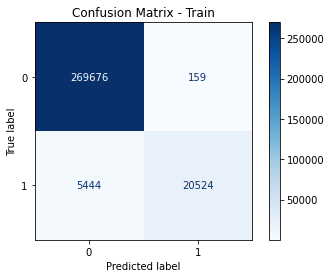

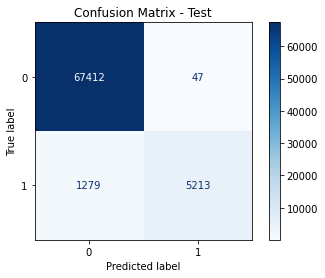

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    269835
           1       0.99      0.79      0.88     25968

    accuracy                           0.98    295803
   macro avg       0.99      0.89      0.93    295803
weighted avg       0.98      0.98      0.98    295803
 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     67459
           1       0.99      0.80      0.89      6492

    accuracy                           0.98     73951
   macro avg       0.99      0.90      0.94     73951
weighted avg       0.98      0.98      0.98     73951
 



In [118]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot(cmap='Blues', include_values=True, values_format='d')
plt.title("Confusion Matrix - Train")
plt.show()

cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot(cmap='Blues', include_values=True, values_format='d')
plt.title("Confusion Matrix - Test")
plt.show()

print(classification_report(y_train,y_pred_train), "\n")
print(classification_report(y_test, y_pred_test), "\n")

- <b> Logistic Regression </b>
  - akurasi testing 98%, akurasi training 98%
  - precision training 97.5%, precision testing 98.5%
  - recall training 89.5%, recall testing 90% <br><br>


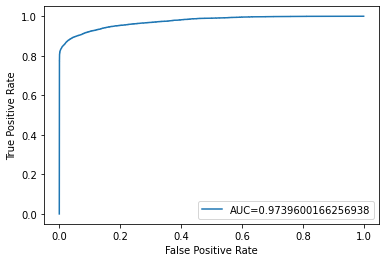

In [117]:
from sklearn.metrics import roc_auc_score, roc_curve

#define metrics
y_pred = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()